In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
customers_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_customers_dataset.csv')
geoloc_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_geolocation_dataset.csv')
order_items_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_order_items_dataset.csv')
order_payments_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_order_payments_dataset.csv')
order_review_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_order_reviews_dataset.csv')
orders_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_orders_dataset.csv')
products_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_products_dataset.csv')
sellers_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/olist_sellers_dataset.csv')
product_categ_name_translation_data =  pd.read_csv('U://DATA/OpenClassrooms/Data science/P5/archive/product_category_name_translation.csv')

list_dataframes = [customers_data, geoloc_data, order_items_data, order_payments_data, order_review_data, orders_data, products_data, sellers_data, product_categ_name_translation_data]

In [3]:
def checktable(df):
    """
    Gives you all the info you need to have to understand your dataframe
    """
    display(df.head())
    print(df.shape)
    print(df.isnull().sum())
    print(df.duplicated().sum())
    print(df.dtypes)
    print(df.describe())


In [4]:
orders_data['order_id'].nunique()

99441

In [5]:
checktable(geoloc_data)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


(1000163, 5)
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
261831
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.

In [6]:
for df in list_dataframes:
    print(df.shape)
    print(df.isnull().sum())

(99441, 5)
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
(1000163, 5)
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
(112650, 7)
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
(103886, 5)
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
(99224, 7)
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
(99441, 8)
order_id      

**Let's start merging some collumns**
- let's ignore order_payments_data, sellers_data and geo localisation ones as they are less intresting
- We will change the product categ into english for better understanding

There are a few missing data in the product_category_name, let's keep them as nan for now, we will remove them in the last datframe



- Bring all the orders dataframe together keeping only the relevant information
- Bring the customers df last on the customer ids

In [7]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [8]:
product_english = pd.merge(
    products_data[['product_id', 'product_category_name']],
    product_categ_name_translation_data[['product_category_name_english', 'product_category_name']],
    on='product_category_name',
    how='left'
)
product_english = product_english.drop(columns='product_category_name')

order = pd.merge(
    orders_data[['order_id','customer_id','order_purchase_timestamp','order_status']],
    order_items_data[['order_id','product_id','price']],
    on='order_id',
    how='right'
)

order = pd.merge(
    order,
    order_review_data[['order_id','review_score']],
    on='order_id',
    how='left'
)

base_data = pd.merge(
    customers_data[['customer_id','customer_unique_id']],
    order,
    on='customer_id',
    how='right'
)

In [9]:
order.head()

,order_id,customer_id,order_purchase_timestamp,order_status,product_id,price,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,delivered,4244733e06e7ecb4970a6e2683c13e61,58.90,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,delivered,e5f2d52b802189ee658865ca93d83a8f,239.90,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,delivered,c777355d18b72b67abbeef9df44fd0fd,199.00,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,delivered,7634da152a4610f1595efa32f14722fc,12.99,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,delivered,ac6c3623068f30de03045865e4e10089,199.90,5.0


In [10]:
checktable(base_data)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_status,product_id,price,review_score
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,delivered,4244733e06e7ecb4970a6e2683c13e61,58.90,5.0
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,delivered,e5f2d52b802189ee658865ca93d83a8f,239.90,4.0
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,delivered,c777355d18b72b67abbeef9df44fd0fd,199.00,5.0
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,delivered,7634da152a4610f1595efa32f14722fc,12.99,4.0
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,delivered,ac6c3623068f30de03045865e4e10089,199.90,5.0


(113314, 8)
customer_id                   0
customer_unique_id            0
order_id                      0
order_purchase_timestamp      0
order_status                  0
product_id                    0
price                         0
review_score                942
dtype: int64
10662
customer_id                  object
customer_unique_id           object
order_id                     object
order_purchase_timestamp     object
order_status                 object
product_id                   object
price                       float64
review_score                float64
dtype: object
               price   review_score
count  113314.000000  112372.000000
mean      120.478701       4.032473
std       183.279678       1.387849
min         0.850000       1.000000
25%        39.900000       4.000000
50%        74.900000       5.000000
75%       134.900000       5.000000
max      6735.000000       5.000000


In [11]:
base_data = base_data.drop_duplicates()

In [12]:
# Convert timestamp column to datetime
base_data['order_purchase_timestamp'] = pd.to_datetime(base_data['order_purchase_timestamp'])


Before we group the data we also need the non grouped data later to see how often do we need to update our model.

So lets save it here

In [18]:
base_data.to_csv('U://DATA/OpenClassrooms/Data science/P5/data_for_rand_index.csv',index=False)

In [13]:
# Group by customer_unique_id and calculate aggregations
aggregated_data = base_data.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'price': 'sum',
    'review_score': 'mean',
    'order_purchase_timestamp': ['max', 'min']
})

# Flatten the column names
aggregated_data.columns = ['frequency', 'monetary', 'review_score', 'recency', 'min_purchase_timestamp']
# Calculate time difference in days
aggregated_data['time_difference'] = (aggregated_data['recency'] - aggregated_data['min_purchase_timestamp']).dt.days

# Calculate frequency per unit of time
aggregated_data['frequency_per_time'] = round(aggregated_data['time_difference'] / aggregated_data['frequency'],1)

# Rename the columns
aggregated_data = aggregated_data.rename(columns={
    'recency': 'max_purchase_timestamp'
}).reset_index()

# Sort by recency in descending order
aggregated_data = aggregated_data.sort_values('review_score', ascending=False)
display(aggregated_data.head())

,customer_unique_id,frequency,monetary,review_score,max_purchase_timestamp,min_purchase_timestamp,time_difference,frequency_per_time
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,2018-05-10 10:56:27,2018-05-10 10:56:27,0,0.0
54953,938638b4e8e194db5e20e3deb15a975f,1,22.99,5.0,2018-08-15 16:55:14,2018-08-15 16:55:14,0,0.0
54926,9379341fe9970e4e730fd4de16b0b9eb,1,89.49,5.0,2017-09-04 14:39:30,2017-09-04 14:39:30,0,0.0
54927,937957cb1bc6deab6796d96f528d849d,1,164.90,5.0,2018-08-07 23:46:11,2018-08-07 23:46:11,0,0.0
54929,937a668a37820388e591a0bfc2392d08,1,65.00,5.0,2017-10-23 16:26:56,2017-10-23 16:26:56,0,0.0


In [14]:
aggregated_data['frequency'].value_counts()

1     89608
2      4869
3       658
4       187
5        47
6        31
7        12
8         4
9         2
16        1
13        1
Name: frequency, dtype: int64

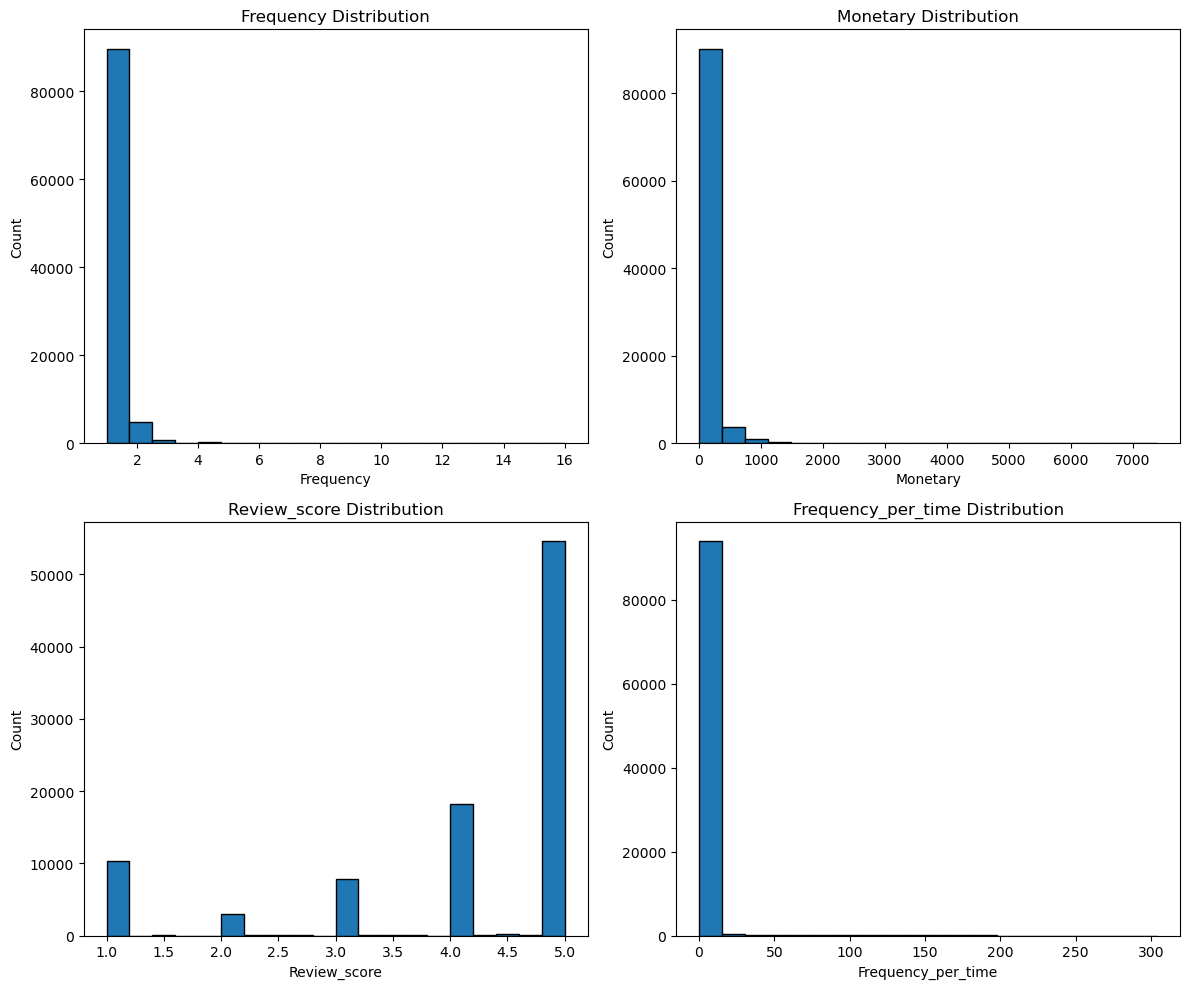

In [15]:
# List of columns for histogram
columns = ['frequency', 'monetary', 'review_score', 'frequency_per_time']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot histograms
for i, column in enumerate(columns):
    axs[i].hist(aggregated_data[column], bins=20, edgecolor='black')
    axs[i].set_title(f'{column.capitalize()} Distribution')
    axs[i].set_xlabel(column.capitalize())
    axs[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**That's gonna be our baseline to start the clustering**

In [16]:
aggregated_data.to_csv('U://DATA/OpenClassrooms/Data science/P5/data_fro_clustering.csv',index=False)